# Diffusion coefficients and the activation energy for p-cresol

<p>In this notebook, I will look at obtaining diffusion coefficients for p-cresol, shown below, from mean squared displacement (MSD) data obtained at three temperatures: 300, 350  and 400 K. These data can then be used to determine the activation energy of diffusion. This method can be applied to any MSD data obtained from molecular dynamics (MD) simulations.</p> 

<p>p-cresol is a molecule of interest in the zeolite catalysis field as it is hoped that it will be able to provide sustainable chemicals which were previously sourced from crude oil. Calculating diffusion coefficients and the activation energy of diffusion allows the diffusion behavior to be determined and this is important in the fine-tuning of zeolite catalysts. </p>

<img src="p_cresol.png" style="width:55px;height:120px"/>

### Observing the data and determining the diffusion behaviour

The data for this set of calculations was converted from an excel file containing the raw MSD data and converted so that it could be easiy loaded using ```np.loadtxt```.

In [1]:
import numpy as np

In [2]:
MSD_data = np.loadtxt('MSD.csv', unpack = True, delimiter = ',')

The data can now be plotted using ```matplotlib.pylot``` to see how the MSD values vary with time as the simulation progresses. The mean squared displacement is a measure of the deviation of the position of a partice with respect to the starting position over time in MD simulations. If a linear relationship is observed as seen below, then it indicates Brownian (normal) diffusion is occuring and we can carry on with calculating with the diffusion coefficients. Other modes of diffusion, subdiffusion and superdiffusion may also be observed.

In [3]:
import matplotlib.pyplot as plt

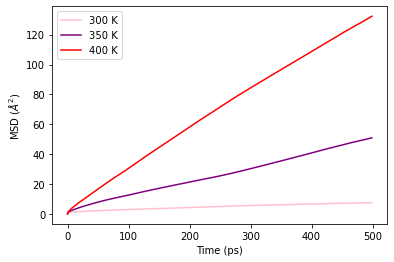

In [4]:
x = MSD_data[0]

plt.plot(x, MSD_data[1], label = '300 K', color = 'pink')
plt.plot(x, MSD_data[2], label = '350 K', color = 'purple')
plt.plot(x, MSD_data[3], label = '400 K', color = 'red')
plt.xlabel('Time (ps)')
plt.ylabel('MSD ($\AA^2$)')
plt.legend()
plt.show()

### Calucalating the diffusion coefficients

The diffusion coefficients can be obtained from the Einstein relation:<br>

$MSD(t) = A + 6Dt$<br>

According to this relationship, a plot of MSD against time gives $6D_s$ as the gradient. Therefore, using the ```linregress``` function from ```scipy.stats```, the value of $6D_s$ can be obtained as the ```slope``` result.

In [5]:
from scipy.stats import linregress

In [6]:
resultx = linregress(x, MSD_data[1])
resulty = linregress(x, MSD_data[2])
resultz = linregress(x, MSD_data[3])

In [7]:
six_ds = np.array([resultx.slope, resulty.slope, resultz.slope])

The $D_s$ values can then be obtained by simply dividing the ```slope``` values by 6 as below. They are then converted from the units Å$^2$/ps, into the more commonly seen units m$^2$/s by multiplying by $10^{-8}$.

In [8]:
Ds_value = six_ds / 6 * 1e-8

In [9]:
print(Ds_value, 'm^2/s')

[2.09504088e-11 1.59219108e-10 4.34570902e-10] m^2/s


Now that we have values for the diffusion coefficients, we can determine errors for them. A function can be defined to shorten the process of obtaining the errors. The function is imported from the ```errors_func``` module and this function calculates the $D_s$ values for smaller samples of the data. The variance in the $D_s$ values is then obtained using ```np.var``` and taken as the error in the $D_s$ values obtained above.

In [10]:
data = [MSD_data[1], MSD_data[2], MSD_data[3]]

In [11]:
import errors_func 

In [12]:
errors = errors_func.errors(MSD_data[0], data)

In [13]:
print(errors, 'm^2/s')

[2.0060989911259417e-15, 1.1385065584920327e-14, 7.977893283803225e-14] m^2/s


We can plot the $D_s$ values against the temperature in order to visulaise the relationship between these two. A line of best fit can also be added using the ```linregress``` function. The ```best_fit``` variable contains multiple values, the ones we are interested in are the ```slope``` and ```intercept``` which can be used to construct new y values for the known x range, using the relationship:<br>

$y = mx + c$<br>

In [14]:
temp = np.linspace(300, 400, 3)

In [15]:
best_fit = linregress(temp, Ds_value)

In [16]:
best_fit

LinregressResult(slope=4.136204934328344e-12, intercept=-1.2427582541408587e-09, rvalue=0.9821810449186482, pvalue=0.12036029512177218, stderr=7.914496217038284e-13)

We can now plot a line of best fit onto the graph along with the $D_s$ values. It can be seen that in this case, the $D_s$ value increases as the temperature increases.

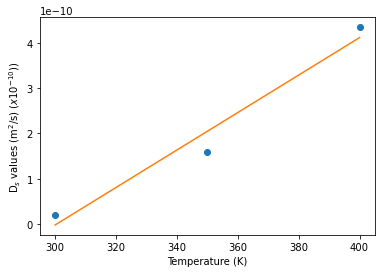

In [17]:
x_a = np.linspace(300, 400, 100)

plt.plot(temp, Ds_value, 'o')
plt.plot(x_a, best_fit.slope * x_a + best_fit.intercept)
plt.xlabel('Temperature (K)')
plt.ylabel('D$_s$ values (m$^2$/s) ($x 10^{-10}$))')
plt.show()

In this section we have found $D_s$ values for 300, 350 and 400 K respectively, to be:<br>

$0.210 \pm 2.01 \times 10^{-5}$ m$^2$/s $(\times 10^{-10})$<br>
$1.59 \pm 1.14 \times 10^{-4}$ m$^2$/s $(\times 10^{-10})$<br>
$4.35 \pm 7.98 \times 10^{-4}$ m$^2$/s $(\times 10^{-10})$<br>

We have also observed the relationship between temperature and the diffusion coefficients.

### Calculating the activation energy of diffusion

The Arrhenius relationship is employed to work out the value of the activation energy of diffusion:<br>

$k = Ae^{\frac{E_a}{RT}}$<br>

As the diffusion coefficients represent the rate constant, we can simply replace k with $D_s$:<br>

$D_s = Ae^{\frac{E_a}{RT}}$<br>

Rearrange to get:<br>

$ln(D_s) = A - \frac{E_a}{RT}$<br>

Using this rearranged form, we can obtain a value for the activation energy of diffusion by plotting $\frac{1}{T}$ against $ln(D_s)$.

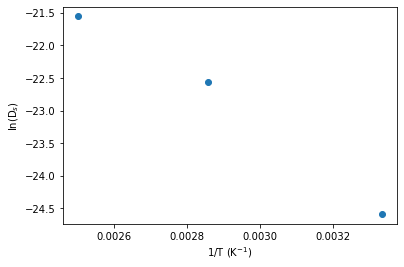

In [18]:
plt.plot(1/temp, np.log(Ds_value), 'o')
plt.xlabel('1/T (K$^{-1}$)')
plt.ylabel('ln(D$_s$)')
plt.show()

We need to fit a model to these data in order to accurately determine the activation energy of diffusion from the data. First, we carry out a linear regression of the $\frac{1}{T}$ and $ln(D_s)$ values.

In [19]:
model_fit = linregress(1/temp, np.log(Ds_value))

In [20]:
model_fit

LinregressResult(slope=-3672.1772231968876, intercept=-12.264432021017617, rvalue=-0.9939257384381933, pvalue=0.07020401419786494, stderr=406.60332864756805)

Using the same idea as above for adding a line of best fit to the $D_s$ against temperature graph, we can model the linear fit for the $\frac{1}{T}$ against $ln(D_s)$ graph. The multiple values within the ```model_fit``` variable give us an idea of how good the model fit is. For example, A $R^2$ value of 0.994 is a relatively high value and suggests that the model fits the data well. However, this is a rather small data set so this could be improved with more data points.<br>

We can now plot a line of best fit onto the graph, using the $y = mx + c$ relationship. The ```slope``` value can then be further utilised to work out the activation energy of diffusion. 

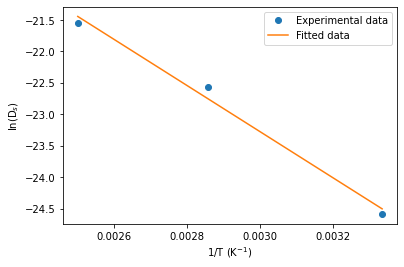

In [21]:
x_b = np.linspace(1/300, 1/400, 100)

plt.plot(1/temp, np.log(Ds_value), 'o', label = 'Experimental data')
plt.plot(x_b, model_fit.slope * x_b + model_fit.intercept, label = 'Fitted data')
plt.xlabel('1/T (K$^{-1}$)')
plt.ylabel('ln(D$_s$)')
plt.legend()
plt.show()

The value we obtain for the ```slope``` is equal to $-\frac{E_a}{R}$<br>

$R$ is imported from ```scipy.constants``` and using the the ```slope``` value we can find the activation energy by multiplying by $-R$, the value obtained is converted from J/mol to kJ/mol by dividing by 1000.

In [22]:
from scipy.constants import R

In [23]:
print(model_fit.slope * -1 * R / 1000, 'kJ/mol')

30.532180248941565 kJ/mol


In this section, we have found the value of the activation energy of diffusion of p-cresol to be 30.53 kJ/mol